## Preliminary data analysis

Checking key variables for each segment

In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from tabulate import tabulate

In [2]:
df = pd.read_csv("../data/ground_truth/onev_all_fields.csv")

In [3]:
df = df.dropna()
df = df[df['pattern'] != 'No']
df = df[df['area'] > 1]
df = df[df['stories'] > 0]

In [4]:
urban_patterns = df['pattern'].unique()

In [5]:
df['log_area'] = df['area'].apply(lambda x: math.log10(x))

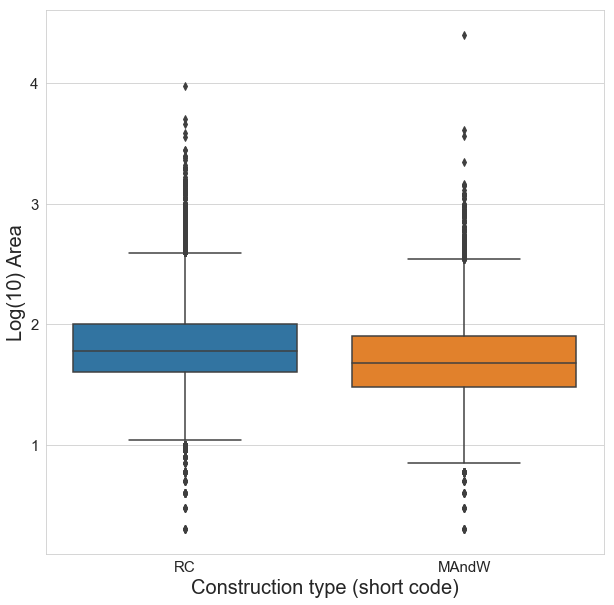

In [6]:
plt.figure(figsize=(10,10))

# Set theme
sns.set_style('whitegrid')
 
# Boxplot
b = sns.boxplot(x='type_short', y='log_area', data=df)

# Edit
b.set_xlabel("Construction type (short code)",fontsize=20)
b.set_ylabel("Log(10) Area",fontsize=20)
b.tick_params(labelsize=15)

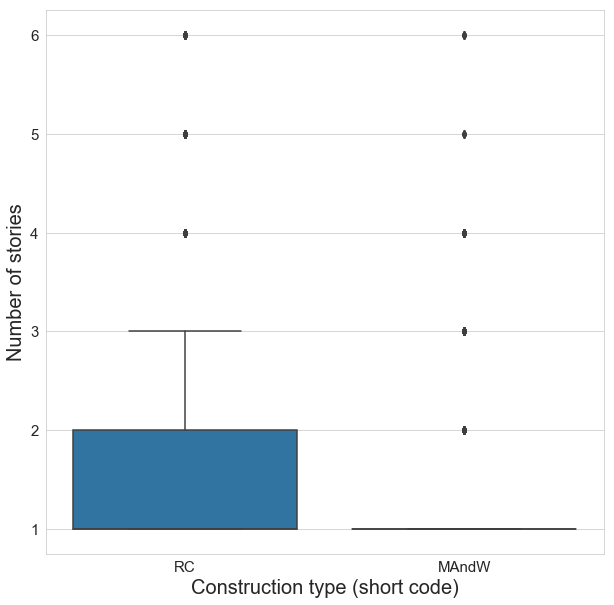

In [7]:
plt.figure(figsize=(10,10))

# Set theme
sns.set_style('whitegrid')
 
# Boxplot
b = sns.boxplot(x='type_short', y='stories', data=df)

# Edit
b.set_xlabel("Construction type (short code)",fontsize=20)
b.set_ylabel("Number of stories",fontsize=20)
b.tick_params(labelsize=15)

In [8]:
df['roof'].unique()

array(['Toiture en béton armé', 'Toiture en bois / Tole',
       'Toiture en acier / tole'], dtype=object)

In [9]:
df.count()['roof']

53175

In [10]:
def rc(x): return 100*(x=='Toiture en béton armé').sum()/x.count()
def tin(x): return 100*((x=='Toiture en bois / Tole') | (x=='Toiture en acier / tole')).sum()/x.count()
df.groupby('pattern').agg({
    'area': ['mean', np.std],
    'stories': ['mean', np.std],
    'roof': [rc, tin]
})

area               stories                 roof           
                   mean         std      mean       std         rc        tin
pattern                                                                      
Industrial    89.045714  153.464692  1.382857  0.649264  46.857143  53.142857
Residential  126.818734  196.422002  1.469644  0.693438  55.724198  44.275802
Rural         61.214570   66.160676  1.129801  0.417266  32.715232  67.284768
Shanty        59.544362  199.038409  1.130366  0.402687  30.509345  69.490655
UrbanIrreg    88.667710  118.763330  1.376673  0.630357  50.594920  49.405080
UrbanReg      90.861678  119.547536  1.447846  0.703225  51.344347  48.655653

In [11]:
df.groupby('type_short').agg({
    'area': ['mean', np.std],
    'stories': ['mean', np.std],
    'roof': [rc, tin]
})

area               stories                 roof           
                 mean         std      mean       std         rc        tin
type_short                                                                 
MAndW       66.770295  195.543835  1.170455  0.456677  23.894690  76.105310
RC          87.219344  128.100866  1.370619  0.636346  54.985222  45.014778